In [37]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

In [38]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split(',')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [43]:
def naiveSMO(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m, n = shape(dataMatrix)
    alphas = mat(zeros((m, 1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0 
        for i in range(m):
            fXi = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b 
            Ei = fXi - float(labelMat[i]) 
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i]>0)):
                #randomly pick j
                j = random.randint(n)
                while i == j:
                    j = random.randint(n)
               
                fXj = float(multiply(alphas, labelMat).T*(dataMatrix*dataMatrix[j, :].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j]+alphas[i] - C)
                    H = min(C, alphas[j]+alphas[i])
                if L == H: 
                    continue
                eta = 2.0 * dataMatrix[i, :]*dataMatrix[j,:].T-dataMatrix[i,:]*dataMatrix[i,:].T-dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: 
                    continue
                                    
                # update alpha
                alphas[j] -= labelMat[j]*(Ei-Ej)/eta
                alphas[j] = clipAlpha(alphas[j], H, L)
                if (abs(alphas[j] - alphaJold) < 0.00001):    # j dose not move enough
                    continue           
                alphas[i] += labelMat[j] * labelMat[i] * (alphaJold-alphas[j])
                
                # update b
                b1 = b - Ei - labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T-labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej - labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T-labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1

        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0

    return b, alphas
    

In [44]:
def draw(alpha, bet, data, label):
    plt.xlabel(u"x1")
    plt.xlim(0, 100)
    plt.ylabel(u"x2")
    for i in range(len(label)):
        if label[i] > 0:
            plt.plot(data[i][0], data[i][1], 'or')
        else:
            plt.plot(data[i][0], data[i][1], 'og')
    w1 = 0.0
    w2 = 0.0
    for i in range(len(label)):
        w1 += alpha[i] * label[i] * data[i][0]
        w2 += alpha[i] * label[i] * data[i][1]
    w = float(- w1 / w2)
    
    b = float(- bet / w2)
    r = float(1 / w2)
    lp_x1 = list([10, 90])
    lp_x2 = []
    lp_x2up = []
    lp_x2down = []
    for x1 in lp_x1:
        lp_x2.append(w * x1 + b)
        lp_x2up.append(w * x1 + b + r)
        lp_x2down.append(w * x1 + b - r)
    lp_x2 = list(lp_x2)
    lp_x2up = list(lp_x2up)
    lp_x2down = list(lp_x2down)
    plt.plot(lp_x1, lp_x2, 'b')
    plt.plot(lp_x1, lp_x2up, 'b--')
    plt.plot(lp_x1, lp_x2down, 'b--')
    plt.show()

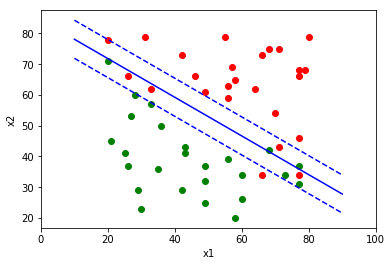

In [45]:
filestr = "F:MLAlgorithm/SVM/svmtest.txt"
dataArr, labelArr = loadDataSet(filestr)
b, alphas = naiveSMO(dataArr, labelArr, 0.5, 0.001, 40)
draw(alphas, b, dataArr, labelArr)